# Proyek Analisis Data: E-commerce-public-dataset
- **Nama:** Hanna Febriani Sutarman
- **Email:** hannafebriani675@gmail.com
- **ID Dicoding:** hannafebriani

## Menentukan Pertanyaan Bisnis

- How are Sales and Revenue Trends from 2016 to 2018?
- What are the Best and Worst Selling Products?
- How is Customer Demographics Distributed by City?
- Who are the Top Sellers by City?
- How is the Review Score Distribution?
- What is the Most Popular Payment Method?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# load customer table
customers_df = pd.read_csv("customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
# load geolocation table
geolocation_df = pd.read_csv("geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
# load order items table
order_items_df = pd.read_csv("order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
# load order payments table
order_payments_df = pd.read_csv("order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
# load order reviews table
order_reviews_df = pd.read_csv("order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
# load orders table
orders_df = pd.read_csv("orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
# load product category name table
product_category_name_df = pd.read_csv("product_category_name_translation.csv")
product_category_name_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
# load products table
products_df = pd.read_csv("products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
# load sellers table
sellers_df = pd.read_csv("sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**

Database have 9 Table : customer, geolocation, order items, order payments, order review, orders, produc category name, product, dan sellers. 

- Customers: customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state.
- Geolocation: geoloction_zip_code_prefix, geolocatatio_lat, geolocation_lng, geolocation_city, geolocation_state.
- Order Items: order_id, order_item_id, product_id, shippin_limit_date, price, freight_value.
- Order Payments: order_id, payment_sequential, payment_type, payement_instalments, payment_value.
- Order Reviews: review_id, order_id, reiew_score, review_comment_title, review_coment_message, review_creation_date, review_answer_timestamp.
- Orders: order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_customer_date, order_estimated_delivery_date.
- Product Category Name: product_category_name, product_category_name_english.
- Products: product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_lenght_cm, product_hight_cm, product_width_cm.
- Sellers: seller_id, seller_zip_code_prefix, seller_city, seller_state.


### Assessing Data

In [11]:
# assessing customers table
customers_df.info()
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [12]:
# assessing geolocation table
geolocation_df.info()
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())
geolocation_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [13]:
# assessing order items table
order_items_df.info()
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())
order_items_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [14]:
# assessing order payments table
order_payments_df.info()
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())
order_payments_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [15]:
# assessing order reviews table
order_reviews_df.info()
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())
order_reviews_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [16]:
# missing value in order reviews table
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [17]:
# assessing orders table
orders_df.info()
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
orders_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [18]:
# missing value in order table
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [19]:
# assessing product category name table
product_category_name_df.info()
print("Jumlah duplikasi: ", product_category_name_df.duplicated().sum())
product_category_name_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [20]:
# assessing products table
products_df.info()
print("Jumlah duplikasi: ", products_df.duplicated().sum())
products_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [21]:
# missing value in products table
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [22]:
# assessing sellers table
sellers_df.info()
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())
sellers_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
- Table geolocation_df has duplicated data at index 261831.
- Table order_items_df has the wrong format in shipping_limit_date; instead of datetime, it is an object.
- Table order_reviews_df has missing values in review_comment_title (87656) and review_comment_message (58247).
- Table orders_df has missing values in order_approved_at (160), order_delivered_carrier_date (1783), and order_delivered_customer_date (2965). Additionally, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, and order_estimated_delivery_date are in the wrong format; instead of datetime, they are objects.
- Table products_df has missing values in product_category_name (610), product_name_length (610), product_description_length (610), and product_photos_qty (610).

### Cleaning Data

In [23]:
# cleaning order items table
# change type data
order_items_df["shipping_limit_date"] = pd.to_datetime(order_items_df["shipping_limit_date"])
    
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [24]:
# cleaning order reviews table
# missing value fill with "No comment"
order_reviews_df[["review_comment_title", "review_comment_message"]] = (
    order_reviews_df[["review_comment_title", "review_comment_message"]].fillna("No comment")
)

order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [25]:
# cleaning orders table
# change type data
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])
    
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [26]:
# missing value checked has delivered or shipped
missing_approved_at = orders_df[(orders_df["order_approved_at"].isna()) & 
                                (orders_df["order_status"].isin(["delivered", "shipped"]))]

print(missing_approved_at.shape)  
print(missing_approved_at.head())  

(14, 8)
                               order_id                       customer_id  \
5323   e04abd8149ef81b95221e88f6ed9ab6a  2127dc6603ac33544953ef05ec155771   
16567  8a9adc69528e1001fc68dd0aaebbb54a  4c1ccc74e00993733742a3c786dc3c1f   
19031  7013bcfc1c97fe719a7b5e05e61c12db  2941af76d38100e0f8740a374f1a5dc3   
22663  5cf925b116421afa85ee25e99b4c34fb  29c35fc91fc13fb5073c8f30505d860d   
23156  12a95a3c06dbaec84bcfb0e2da5d228a  1e101e0daffaddce8159d25a8e53f2b2   

      order_status order_purchase_timestamp order_approved_at  \
5323     delivered      2017-02-18 14:40:00               NaT   
16567    delivered      2017-02-18 12:45:31               NaT   
19031    delivered      2017-02-18 13:29:47               NaT   
22663    delivered      2017-02-18 16:48:35               NaT   
23156    delivered      2017-02-17 13:05:55               NaT   

      order_delivered_carrier_date order_delivered_customer_date  \
5323           2017-02-23 12:04:47           2017-03-01 13:25:33   
16

In [27]:
# fill order approved at with order purchase time if order status delivered or shipped
orders_df.loc[(orders_df["order_approved_at"].isna()) & 
              (orders_df["order_status"].isin(["delivered", "shipped"])), 
              "order_approved_at"] = orders_df["order_purchase_timestamp"]

orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 146
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [28]:
# fill order delivered carrier date with order purchase time if order status delivered or shipped
orders_df.loc[orders_df["order_status"].isin(["delivered", "shipped"]) & orders_df["order_delivered_carrier_date"].isna(),
             "order_delivered_carrier_date"] = orders_df["order_purchase_timestamp"]

orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 146
order_delivered_carrier_date     1781
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [29]:
# fill order delivered customer date at with order purchase time if order status delivered 
avg_shipping_days = (orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]).dt.days.mean()
orders_df.loc[(orders_df["order_status"] == "delivered") & orders_df["order_delivered_customer_date"].isna(),
              "order_delivered_customer_date"] = orders_df["order_delivered_carrier_date"] + pd.to_timedelta(avg_shipping_days, unit='D')

orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 146
order_delivered_carrier_date     1781
order_delivered_customer_date    2957
order_estimated_delivery_date       0
dtype: int64

In [30]:
# cleaning products table
# missing value
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [31]:
products_df["product_category_name"] = (
    products_df["product_category_name"].fillna("Unknown")
)

# Check if missing values still exist
products_df.isna().sum()

product_id                      0
product_category_name           0
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

**Insight:**
- The geolocation table does not need to be fixed for duplicates, as duplication might be possible, and this table is not used.
- The shipping_limit_date column in the order_items_df table has been converted to datetime.
- Missing values in review_comment_title and review_comment_message in the order_reviews_df table have been filled with "No Comment" instead.
- The format of order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, and order_estimated_delivery_date in the orders_df table has been changed to datetime.
- Missing values in orders_df in the columns order_approved_at, order_delivered_carrier_date, and order_delivered_customer_date have been filled with order_purchase_timestamp if the status is "delivered" or "shipped." If not, it may be "canceled," but the missing values should remain as they are.
- Missing values in the product_category_name column of the products_df table have been filled with "Unknown." For other columns, the missing values have been left as they are since they are not used. Dropping them could result in information loss.

## Exploratory Data Analysis (EDA)

In [32]:
# Customers_df
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [33]:
# Top Cutomers by City
customers_city = customers_df.groupby(by="customer_city").customer_unique_id.nunique().sort_values(ascending=False).reset_index()
customers_city.head(10)

,customer_city,customer_unique_id
0,sao paulo,14984
1,rio de janeiro,6620
2,belo horizonte,2672
3,brasilia,2069
4,curitiba,1465
5,campinas,1398
6,porto alegre,1326
7,salvador,1209
8,guarulhos,1153
9,sao bernardo do campo,908


In [34]:
# Top customer by State
customers_state = customers_df.groupby(by="customer_state").customer_unique_id.nunique().sort_values(ascending=False).reset_index()
customers_state.head(10)

,customer_state,customer_unique_id
0,SP,40302
1,RJ,12384
2,MG,11259
3,RS,5277
4,PR,4882
5,SC,3534
6,BA,3277
7,DF,2075
8,ES,1964
9,GO,1952


In [35]:
# order_items_df
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


In [36]:
# get total revenue
order_items_df["revenue"] = order_items_df["price"] + order_items_df["freight_value"]
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,revenue
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04


In [37]:
# join order items and products
order_products_df = pd.merge(
    left=order_items_df,
    right=products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
order_products_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,revenue,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [38]:
# Total orders by product category name
order_products_translation_df = pd.merge(
    left=order_products_df,
    right=product_category_name_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
product_sales = order_products_translation_df.groupby(by="product_category_name_english").order_item_id.sum().sort_values(ascending=False).reset_index()
product_sales.head(10)

,product_category_name_english,order_item_id
0,bed_bath_table,13665
1,furniture_decor,11540
2,health_beauty,11081
3,sports_leisure,9932
4,computers_accessories,9874
5,housewares,9051
6,watches_gifts,6594
7,garden_tools,5874
8,telephony,5161
9,auto,4881


In [39]:
# revenue by product category
product_revenue = order_products_translation_df.groupby(by="product_category_name_english").revenue.sum().sort_values(ascending=False).reset_index()
product_revenue.head(10)

,product_category_name_english,revenue
0,health_beauty,1441248.07
1,watches_gifts,1305541.61
2,bed_bath_table,1241681.72
3,sports_leisure,1156656.48
4,computers_accessories,1059272.40
5,furniture_decor,902511.79
6,housewares,778397.77
7,cool_stuff,719329.95
8,auto,685384.32
9,garden_tools,584219.21


In [40]:
# Total orders by sellers
order_sellers_df = pd.merge(
    left=order_products_translation_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)

city_sales = order_sellers_df.groupby(by="seller_city").order_item_id.sum().sort_values(ascending=False).reset_index()
city_sales.head(10)

,seller_city,order_item_id
0,sao paulo,33946
1,ibitinga,9542
2,sao jose do rio preto,3659
3,santo andre,3516
4,curitiba,3497
5,rio de janeiro,2912
6,belo horizonte,2847
7,guarulhos,2839
8,maringa,2777
9,ribeirao preto,2696


In [41]:
# order_payments_df
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [42]:
# Popular payment method
order_payments = order_payments_df[order_payments_df["payment_type"] != "not_defined"].groupby(by="payment_type").order_id.nunique().sort_values(ascending=False).reset_index()
print(order_payments)

  payment_type  order_id
0  credit_card     76505
1       boleto     19784
2      voucher      3866
3   debit_card      1528


In [43]:
# order_reviews_df
order_reviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4528,36160,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,No comment,No comment,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,87656,58247,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [44]:
# review score distribution
order_reviews_df.groupby(by="review_score").order_id.nunique().sort_values(ascending=False).reset_index()

,review_score,order_id
0,5,57076
1,4,19098
2,1,11393
3,3,8160
4,2,3148


In [45]:
# order_df
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99295,97660,96484,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 17:30:18.775014144,2018-01-04 21:45:03.728742656,2018-01-14 12:21:01.100246016,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 21:59:48.500000,2017-09-15 22:24:45,2017-09-25 22:08:25.750000128,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 10:55:46,2018-01-24 16:06:21,2018-02-02 19:32:21,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:15:18.500000,2018-05-08 13:37:15,2018-05-15 23:08:54.249999872,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [46]:
# delayed orders
delayed_orders = orders_df["order_delivered_customer_date"] > orders_df["order_estimated_delivery_date"]
print(f"Total delayed orders: {delayed_orders}")

Total delayed orders: 0        False
1        False
2        False
3        False
4        False
         ...  
99436    False
99437    False
99438    False
99439    False
99440    False
Length: 99441, dtype: bool


In [47]:
# distribution order status
status = orders_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)
print(status)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64


**Insight:**
- The city with the highest number of customers is Sao Paulo, with 14,984 customers.
- The state with the highest number of customers is SP, with 40,302 customers.
- A revenue column needs to be added to the order_items_df table.
- The product category with the highest number of orders is bed bath table, with 13,665 orders.
- The product category with the highest revenue is health & beauty, with 1,441,248.07 in revenue.
- The city with the highest number of sellers is Sao Paulo, with 33,946 orders.
- The most used payment method is credit card, with 76,505 transactions.
- The most common review score is 5, with 57,076 orders.
- There are zero delayed orders.
- The most common order status is delivered, with 96,478 orders.

## Visualization & Explanatory Analysis

### Pertanyaan 1: How are Sales and Revenue Trends from 2016 to 2018?

In [48]:
# join to get date
orders_all_df = pd.merge(
    left=order_sellers_df,
    right=orders_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orders_all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,revenue,product_category_name,product_name_lenght,...,seller_zip_code_prefix,seller_city,seller_state,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19,cool_stuff,58.0,...,27277,volta redonda,SP,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83,pet_shop,56.0,...,3471,sao paulo,SP,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87,moveis_decoracao,59.0,...,37564,borda da mata,MG,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78,perfumaria,42.0,...,14403,franca,SP,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04,ferramentas_jardim,59.0,...,87900,loanda,PR,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17


In [49]:
sales_trends = orders_all_df.resample(rule='M', on="order_purchase_timestamp").agg({
    "order_id": "nunique",
    "revenue": "sum"
}).reset_index()

sales_trends["year_month"] = sales_trends["order_purchase_timestamp"].dt.strftime('%Y-%m')

sales_trends.rename(columns={
    "order_id": "order_count"
}, inplace=True)

sales_trends.head()

,order_purchase_timestamp,order_count,revenue,year_month
0,2016-09-30,3,354.75,2016-09
1,2016-10-31,308,56808.84,2016-10
2,2016-11-30,0,0.00,2016-11
3,2016-12-31,1,19.62,2016-12
4,2017-01-31,789,137188.49,2017-01


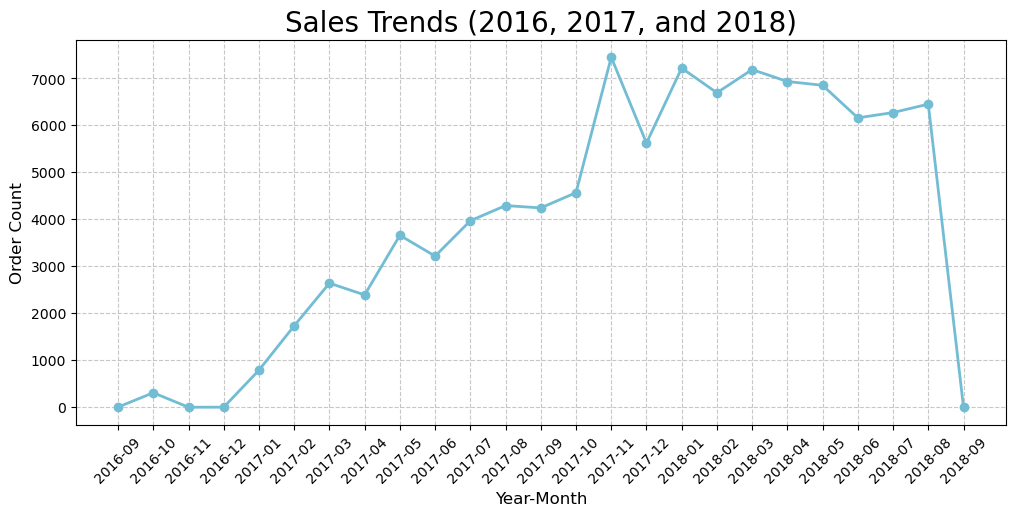

In [50]:
# Sales Trends

plt.figure(figsize=(12, 5))
plt.plot(sales_trends["year_month"], sales_trends["order_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Sales Trends (2016, 2017, and 2018)", loc="center", fontsize=20)
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Order Count", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()

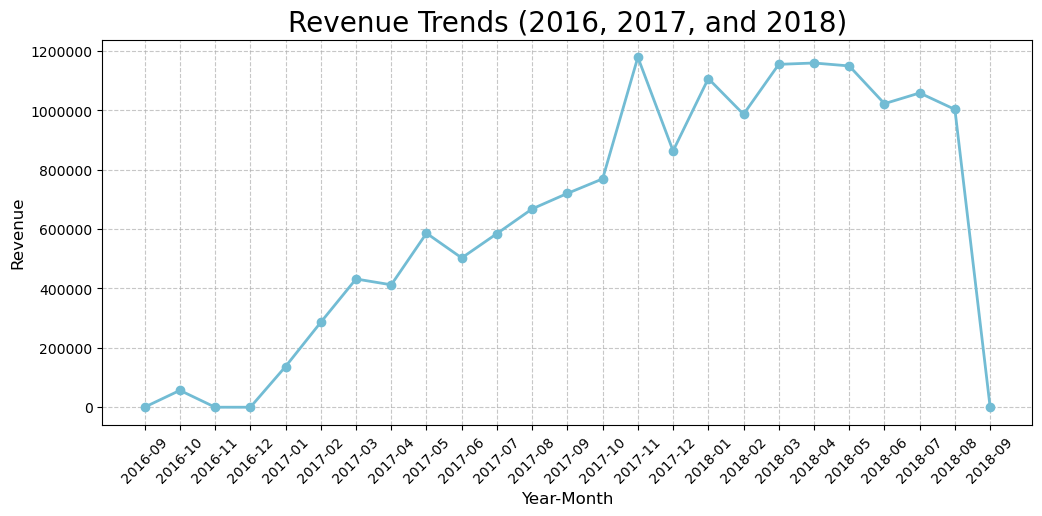

In [51]:
# Revenue trends
plt.figure(figsize=(12, 5))
plt.plot(sales_trends["year_month"], sales_trends["revenue"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Revenue Trends (2016, 2017, and 2018)", loc="center", fontsize=20)
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()

### Pertanyaan 2: What are the Best and Worst Selling Products?

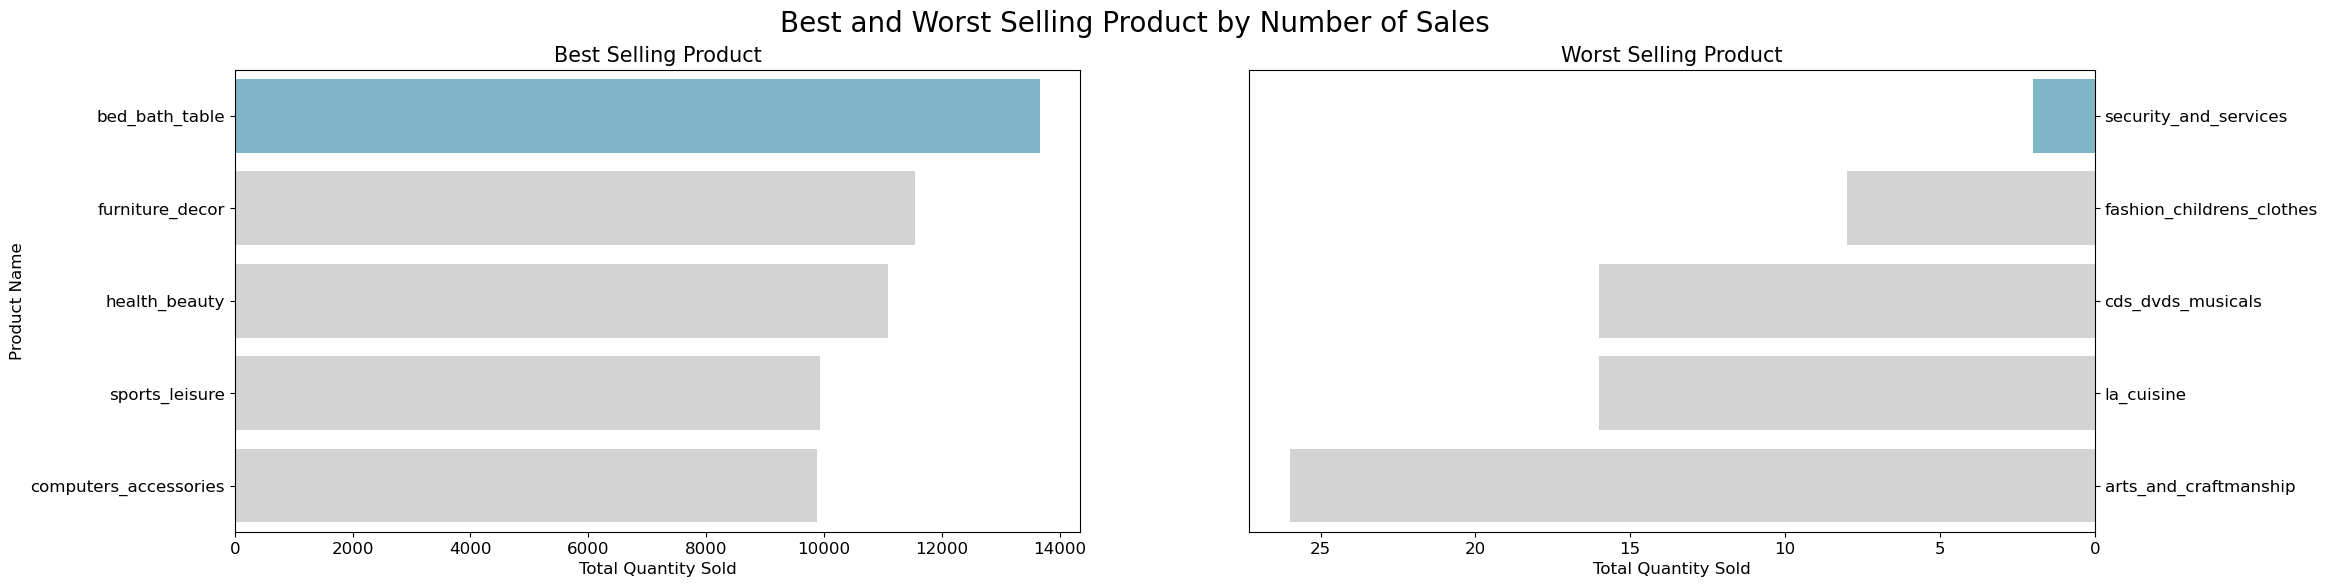

In [52]:
best_selling = product_sales.sort_values(by="order_item_id", ascending=False).head(5)
worst_selling = product_sales.sort_values(by="order_item_id", ascending=True).head(5)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="order_item_id", y="product_category_name_english", data=best_selling, palette=colors, ax=ax[0])
ax[0].set_ylabel("Product Name", fontsize=12)
ax[0].set_xlabel("Total Quantity Sold", fontsize=12)
ax[0].set_title("Best Selling Product", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)
ax[0].tick_params(axis='x', labelsize=12)

sns.barplot(x="order_item_id", y="product_category_name_english", data=worst_selling, palette=colors, ax=ax[1])
ax[1].set_ylabel("")
ax[1].set_xlabel("Total Quantity Sold", fontsize=12)
ax[1].set_title("Worst Selling Product", loc="center", fontsize=15)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=12)
ax[1].tick_params(axis='x', labelsize=12)


plt.suptitle("Best and Worst Selling Product by Number of Sales", fontsize=20)
plt.show()

### Pertanyaan 3: How is Demography Customer by City?

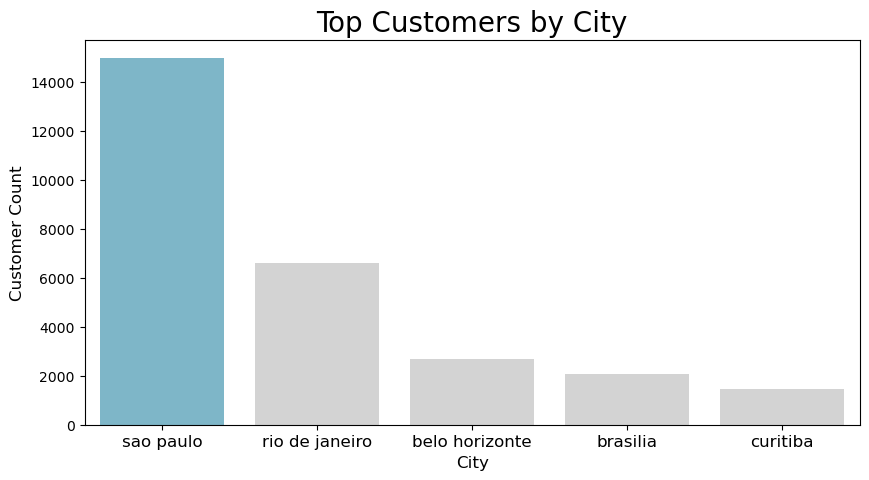

In [53]:
# demografi customer by city
plt.figure(figsize=(10, 5))

sns.barplot(
    y="customer_unique_id",
    x="customer_city",
    data=customers_city.head(5),
    palette=colors
)

plt.title("Top Customers by City", loc="center", fontsize=20)
plt.ylabel("Customer Count", fontsize=12)
plt.xlabel("City", fontsize=12)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 4: Who are the Top Sellers by City?

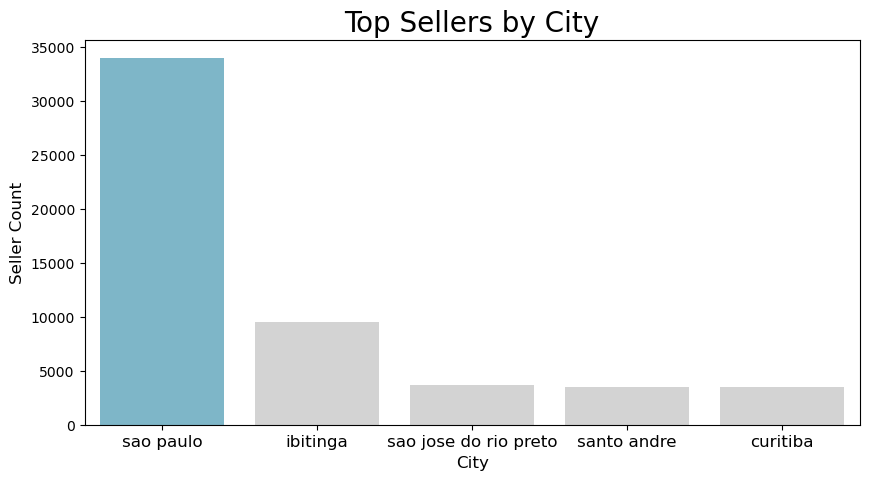

In [54]:
#Top sellers by City
plt.figure(figsize=(10, 5))

sns.barplot(
    y="order_item_id",
    x="seller_city",
    data=city_sales.head(5),
    palette=colors
)

plt.title("Top Sellers by City", loc="center", fontsize=20)
plt.ylabel("Seller Count", fontsize=12)
plt.xlabel("City", fontsize=12)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 5: How is The Review Score DIstribution?

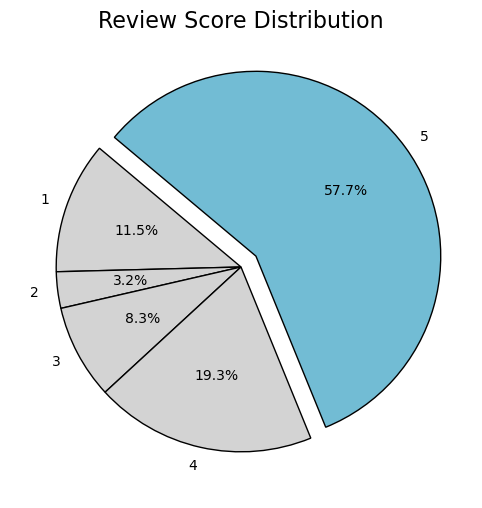

In [55]:
# review score distribuion
reviews = order_reviews_df.groupby(by="review_score")["order_id"].nunique().reset_index().sort_values(by="review_score")
max_review_score = reviews.loc[reviews["order_id"].idxmax(), "review_score"]
colorsby = ["#72BCD4" if score == max_review_score else "#D3D3D3" for score in reviews["review_score"]]

explode = [0.1 if score == max_review_score else 0 for score in reviews["review_score"]]

plt.figure(figsize=(8, 6))
plt.pie(
    reviews["order_id"], 
    labels=reviews["review_score"], 
    autopct='%1.1f%%', 
    colors=colorsby,  
    startangle=140, 
    explode=explode, 
    wedgeprops={'edgecolor': 'black'}
)

plt.title("Review Score Distribution", fontsize=16)
plt.show()

### Pertanyaan 6:What is the Most Popular Payment Method?

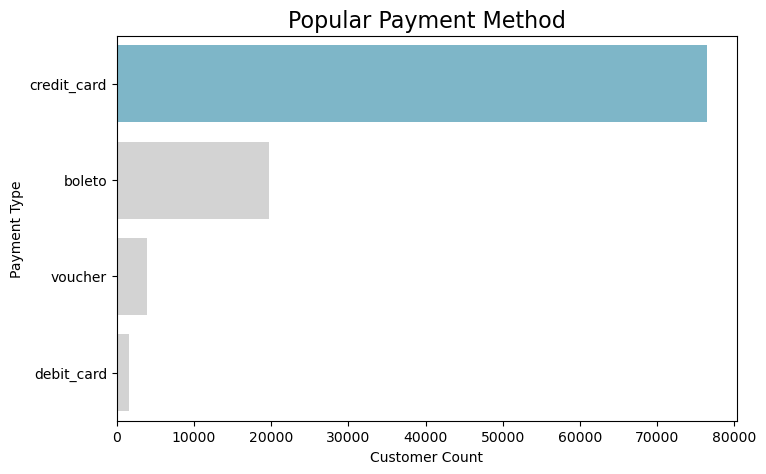

In [56]:
# popular payment method
plt.figure(figsize=(8, 5))
sns.barplot(
    x=order_payments["order_id"].head(5),
    y=order_payments["payment_type"].head(5),
    palette=colors
)
plt.xlabel("Customer Count")
plt.ylabel("Payment Type")
plt.title("Popular Payment Method", fontsize=16)
plt.show()


**Insight:**
- Strong Growth (2017-2018): Both sales and revenue increased significantly, peaking in late 2017 to early 2018.
- Stable Phase (Early-Mid 2018): Sales and revenue remained steady, indicating consistent demand and pricing.
- Sharp Decline (Sept 2018): A sudden drop in both metrics suggests a possible business issue, seasonal decline, or data gap.

- Best Selling Product: "bed_bath_table" had the highest sales, indicating strong demand in the home essentials category.
- Worst Selling Product: "security_and_services" had the lowest sales, likely due to niche demand or low consumer interest.

- Highest Customer Base: São Paulo has the most customers, significantly surpassing other cities. This suggests a strong market presence and high demand in this area.
- Smaller Customer Bases: Cities like Belo Horizonte, Brasília, and Curitiba have notably lower customer counts, suggesting limited reach or lower demand in these regions.


- Sao Paulo has the highest number of sellers, significantly surpassing other cities with over 34,000 sellers. This suggests a highly competitive market and a major hub for business operations.
- Sao Jose do Rio Preto, Santo Andre, and Curitiba each have a much lower seller count (around 3,000 to 4,000). These cities may have growing or niche markets but are not as dominant as Sao Paulo.

- A significant 57.7% of customers rated 5 stars, indicating strong satisfaction with the product or service.
- 11.5% of customers gave 1 star, which indicates some dissatisfaction but not a major concern.

- A significant majority of customers prefer credit cards, indicating high trust in digital payments. This could be due to benefits like installments, cashback, or rewards programs.
- Debit cards and vouchers are less preferred, possibly indicating low integration of direct bank payments in the market. This could also mean that customers prefer flexible payment options like credit cards over direct deductions.

## Conclusion

- Conclusion question 1 : Sales and revenue showed a strong correlation, with steady growth until early 2018, followed by a sudden decline in September 2018.
- Conclusion question 2 : Home essentials, beauty, and fitness products dominated sales, while security services and physical media performed poorly, likely due to lower demand or market shifts.
- Conclusion question 3 : São Paulo is the dominant market, making it a key focus area for sales and marketing strategies. Expansion efforts could target Rio de Janeiro and other cities with lower customer counts to increase market penetration.
- Concusion question 4 : Sao Paulo is the primary hub for sellers, showing a high concentration of businesses and competition. Other cities, like Ibitinga, may have emerging markets but lack the scale of Sao Paulo. This insight is useful for business expansion strategies, targeted marketing, and resource allocation.
- Conclusion question 5 : The business has a strong reputation, with over 77% of customers giving 4 or 5 stars. However, addressing the concerns of the 11.5% giving 1-star reviews could further improve customer satisfaction and retention.
- Conclusion question 6 : Businesses should prioritize credit card payment options to cater to the largest customer base. Understanding these trends can help businesses optimize payment options for higher conversions.

### Analisis Lanjutan

**rfm**

In [57]:
# rfm
rfm_df = orders_all_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp" : "max",
    "order_id": "nunique",
    "revenue": "sum"
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_all_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,293
1,000161a058600d5901f007fab4c27140,1,67.41,414
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,552
3,0002414f95344307404f0ace7a26f1d5,1,179.35,383
4,000379cdec625522490c315e70c7a9fb,1,107.01,154


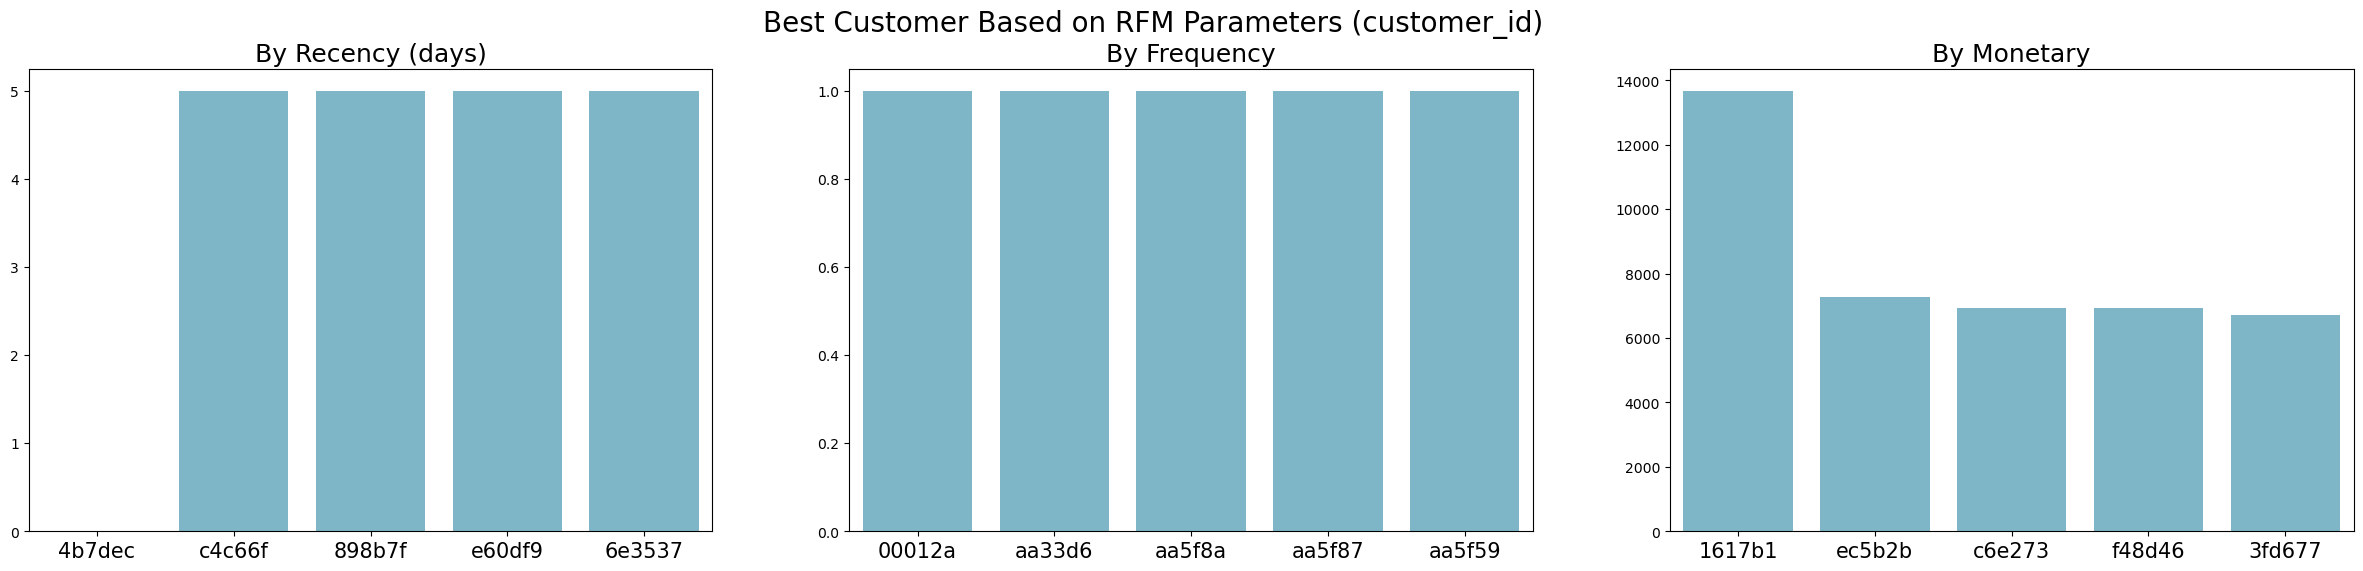

In [58]:
rfm_df["customer_id_short"] = rfm_df["customer_id"].str[:6]
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id_short", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
 
sns.barplot(y="frequency", x="customer_id_short", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
 
sns.barplot(y="monetary", x="customer_id_short", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
 
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

**Insights**
- The five customers shown have the same recency score (around 5 days), meaning they are all recent buyers. This suggests they are highly engaged and active customers.
- The five customers listed here all have equal frequency scores, meaning they have made frequent purchases. This indicates they are loyal customers who repeatedly buy from the business.
- The highest-spending customer (1617b1) has spent significantly more than the others (around 14,000). The other four customers have similar spending amounts but are far behind the top spender. This suggests that while some customers buy frequently, their spending amount varies significantly.

**Conclution**
- The business has a set of highly engaged and loyal customers (from Recency and Frequency scores).
- Some customers (especially 1617b1) contribute more revenue than others, which can be leveraged for premium offers or VIP programs.
- To maximize revenue, businesses can incentivize high-frequency buyers to spend more (e.g., bundle offers, exclusive deals).
- Targeted marketing campaigns can help convert recent buyers into high-frequency and high-monetary customers.

In [59]:
# join to correlation between customers and date
ecommerce_all_df = pd.merge(
    left=orders_all_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
ecommerce_all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,revenue,product_category_name,product_name_lenght,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19,cool_stuff,58.0,...,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83,pet_shop,56.0,...,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87,moveis_decoracao,59.0,...,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78,perfumaria,42.0,...,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04,ferramentas_jardim,59.0,...,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


**There is anomaly in daily orders, so it is to continue analysis**

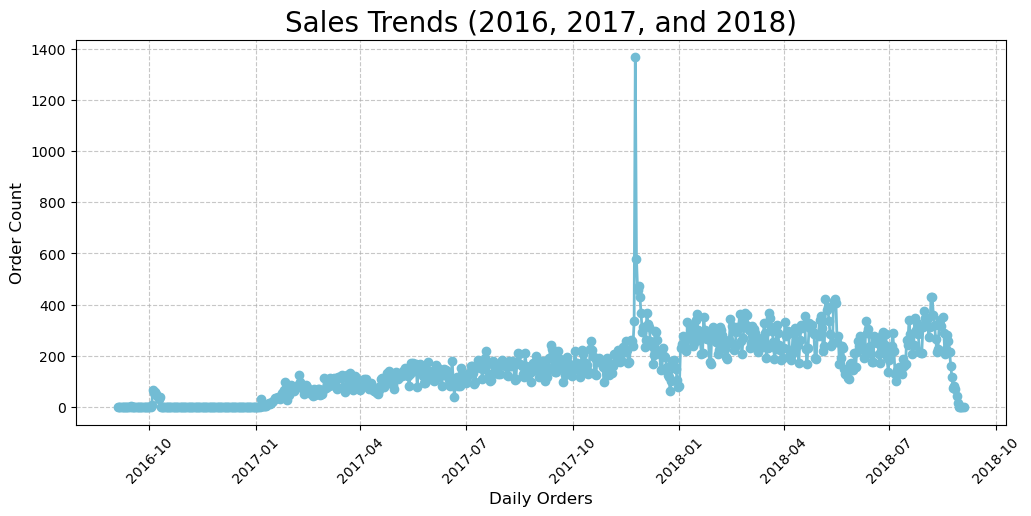

In [60]:
# Daily Orders
daily_orders = ecommerce_all_df.resample(rule='D', on="order_purchase_timestamp").agg({
    "order_id": "count",
    "revenue": "sum"
}).reset_index()

daily_orders.rename(columns={
    "order_id": "order_count"
}, inplace=True)

plt.figure(figsize=(12, 5))
plt.plot(daily_orders["order_purchase_timestamp"], daily_orders["order_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Sales Trends (2016, 2017, and 2018)", loc="center", fontsize=20)
plt.xlabel("Daily Orders", fontsize=12)
plt.ylabel("Order Count", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()

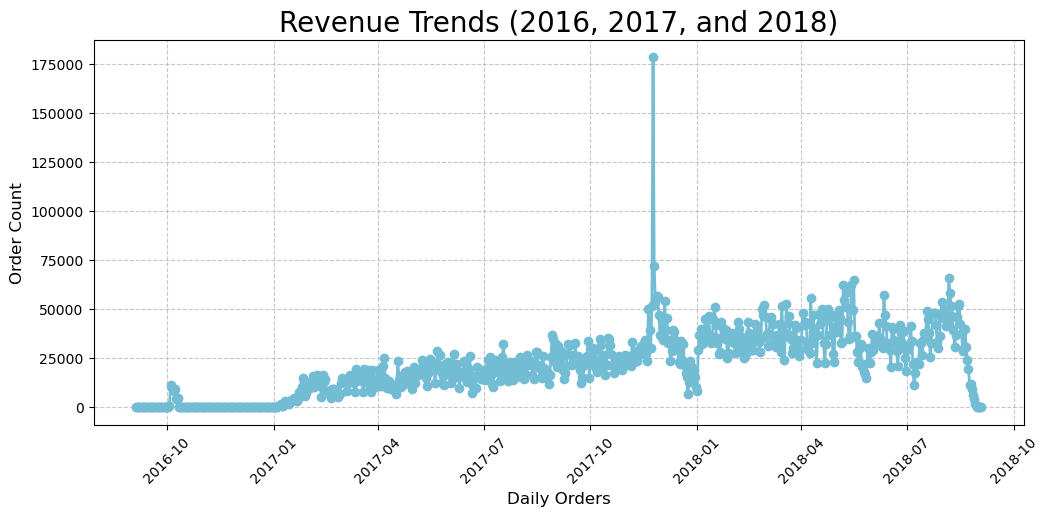

In [61]:
plt.figure(figsize=(12, 5))
plt.plot(daily_orders["order_purchase_timestamp"], daily_orders["revenue"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Revenue Trends (2016, 2017, and 2018)", loc="center", fontsize=20)
plt.xlabel("Daily Orders", fontsize=12)
plt.ylabel("Order Count", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()

In [62]:
# checked duplicates order_id
orders_df.duplicated(subset=["order_id"]).sum()

0

In [63]:
orders_df["order_purchase_timestamp"] = pd.to_datetime(orders_df["order_purchase_timestamp"])
daily_orders = orders_df.groupby(orders_df["order_purchase_timestamp"].dt.date).order_id.nunique().reset_index()
daily_orders.columns = ["date", "total_orders"]

# checked high orders
daily_orders.sort_values(by="total_orders", ascending=False).head(10)


,date,total_orders
338,2017-11-24,1176
339,2017-11-25,499
341,2017-11-27,403
340,2017-11-26,391
342,2017-11-28,380
502,2018-05-07,372
593,2018-08-06,372
594,2018-08-07,370
509,2018-05-14,364
511,2018-05-16,357


In [64]:
# checked anomaly in others parametrics
ecommerce_all_df[ecommerce_all_df["order_purchase_timestamp"].dt.date == pd.to_datetime("2017-11-24").date()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,revenue,product_category_name,product_name_lenght,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
30,00137e170939bba5a3134e2386413108,1,672e757f331900b9deea127a2a7b79fd,e59aa562b9f8076dd550fcddf0e73491,2017-11-30 06:30:55,397.0,24.65,421.65,agro_industria_e_comercio,39.0,...,delivered,2017-11-24 16:50:38,2017-11-25 06:30:55,2017-11-28 19:43:52,2017-12-11 19:12:55,2017-12-18,38c3bc2d6df03905e3e8d3d5b079acf4,22790,rio de janeiro,RJ
47,001c85b5f68d2be0cb0797afc9e8ce9a,1,84f456958365164420cfc80fbe4c7fab,4a3ca9315b744ce9f8e9374361493884,2017-11-29 22:38:47,99.0,13.71,112.71,cama_mesa_banho,55.0,...,delivered,2017-11-24 19:19:18,2017-11-24 22:38:47,2017-11-27 12:42:15,2017-12-22 18:37:40,2017-12-14,55a269f324455e78349e7b9b7e7e5911,8072,sao paulo,SP
65,00275bce676303c3bfd7292aefdfa223,1,6490b9f63b0b595e1c1402b46b0f50ad,99eaacc9e6046db1c82b163c5f84869f,2017-12-04 03:32:47,279.9,13.46,293.36,telefonia,24.0,...,delivered,2017-11-24 23:10:30,2017-11-28 03:39:45,2017-11-29 17:28:59,2017-12-04 19:42:16,2017-12-14,c5e94cf711798a7bdde48952d2b3ee28,4474,sao paulo,SP
82,0030d783f979fbc5981e75613b057344,1,ae27a5524edb2c8dc4656c670f458fb7,8e6cc767478edae941d9bd9eb778d77a,2017-11-29 23:13:38,60.6,17.67,78.27,utilidades_domesticas,58.0,...,delivered,2017-11-24 20:03:02,2017-11-24 23:13:38,2017-12-15 19:34:13,2018-01-06 00:25:43,2017-12-15,199888480790cc4f6135f3a3e11af83e,22743,rio de janeiro,RJ
96,0035c0b07126fe9c24a325216fb96064,1,ec02a5d380128f7a188e9ce8f3ddd832,8444e55c1f13cd5c179851e5ca5ebd00,2017-12-12 01:29:45,131.9,18.54,150.44,cool_stuff,59.0,...,delivered,2017-11-24 01:08:37,2017-11-24 01:29:45,2017-11-28 17:17:17,2017-12-07 16:59:21,2018-01-03,9392534851a5f1f12396b5f897f9f2ad,13075,campinas,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112245,ff00a56fe9475a175cd651d77c707a09,3,056d012d264624accb7f73d31caee034,8160255418d5aaa7dbdc9f4c64ebda44,2017-11-30 01:10:14,116.9,46.31,163.21,cama_mesa_banho,56.0,...,delivered,2017-11-24 00:08:10,2017-11-24 01:10:14,2017-11-29 17:48:57,2017-12-18 13:14:05,2017-12-26,6be28ae15cd1e7b3f3f36ac483512822,95041,caxias do sul,RS
112503,ffa9a3142ddd51af248e648db27c647f,1,d8a77723111124b921fd73b3914e8cbb,0241d4d5d36f10f80c644447315af0bd,2017-11-30 20:31:35,29.9,17.92,47.82,moveis_decoracao,56.0,...,delivered,2017-11-24 16:42:12,2017-11-24 20:32:47,2017-11-28 21:58:55,2017-12-12 19:04:28,2017-12-21,f06a1ab06893b6c407e57dde5b62fd39,26440,japeri,RJ
112550,ffc1be2cfc663c95a4663eae09796e19,1,3cce0d166c3fb2507956c630c1d0f87c,95e03ca3d4146e4011985981aeb959b9,2017-12-06 00:22:09,79.9,16.32,96.22,casa_construcao,58.0,...,delivered,2017-11-24 21:23:08,2017-11-25 00:22:09,2017-11-28 18:19:38,2017-12-12 23:41:42,2017-12-21,18cf733f47d311419adac897bfa46b70,11628,sao sebastiao,SP
112592,ffde92ba447b33a47d1c04d203f10f41,1,a97cd00f5c1dbfbc7f0f4b6c1032253e,b347677812ea483b0f528eaf8cbc09b7,2017-11-30 14:13:18,278.0,26.70,304.70,utilidades_domesticas,59.0,...,delivered,2017-11-24 12:12:36,2017-11-24 14:13:18,2017-11-27 17:49:45,2017-12-05 17:56:55,2017-12-19,4bfdc85625e24bc269329cd2ca2bb30c,13471,americana,SP


In [65]:
# checked product category orders in the date
top_products = ecommerce_all_df[
    ecommerce_all_df["order_id"].isin(
        ecommerce_all_df[ecommerce_all_df["order_purchase_timestamp"].dt.date == pd.to_datetime("2017-11-24").date()]["order_id"]
    )
].groupby("product_category_name_english").size().sort_values(ascending=False).head(10)
print(top_products)

product_category_name_english
bed_bath_table           195
furniture_decor          136
garden_tools             102
sports_leisure            91
health_beauty             89
telephony                 79
watches_gifts             75
toys                      73
computers_accessories     71
perfumery                 62
dtype: int64


**Insight:**
- The spike in sales on November 24, 2017, is a real trend rather than an anomaly, as it involves various customer IDs, sellers, and product categories.
- This surge may be linked to a promotional campaign, seasonal event, or external market factors that encouraged more purchases on that particular day.
- The overall trend shows a steady increase in transactions over time, with occasional fluctuations that may correspond to marketing strategies or consumer behavior shifts.

**Conclusion:**
- The observed spike is not an outlier, data duplication, or system error, but rather a genuine increase in sales activity.
- Further analysis into marketing campaigns, discounts, or external events on that date could provide deeper insights into what drove this significant increase in transactions.

In [66]:
# save data
ecommerce_all_df.to_csv("ecommerce_all_df.csv", index=False)